In [17]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1) You should plot the estimated trajectory of coordinates [x*,y*], together with the real [x,y] 
and the noisy ones [a,b] for comparison. Discuss how you arrive to the solution and justify 
any choices of parameter(s) associated with Kalman Filter. 

In [26]:
def kalman_filter(noisy_coords):
    # Initialization
    x_hat = np.array([noisy_coords[0][0], noisy_coords[0][1], 0, 0])  # Initial position estimate [x, y, vx, vy]
    P = np.eye(4)  # Initial state covariance matrix
    F = np.array([[1, 0, 0.2, 0], [0, 1, 0, 0.2], [0, 0, 1, 0], [0, 0, 0, 1]])  # Motion model matrix
    H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])  # Observation model matrix

    # Covariance matrices (Q and R)
    Q = np.array([[0.16, 0, 0, 0],
              [0, 0.36, 0, 0],
              [0, 0, 0.16, 0],
              [0, 0, 0, 0.36]]) # Process noise covariance matrix
    R = np.eye(2) * 0.25  # Measurement noise covariance matrix

    estimated_coords = []
    for obs in noisy_coords:
        # Predict step
        x_hat = F.dot(x_hat)
        P = F.dot(P).dot(F.T) + Q

        # Update step
        y = np.array([obs[0] - H.dot(x_hat)[0], obs[1] - H.dot(x_hat)[1]])  # Residual
        S = H.dot(P).dot(H.T) + R  # Innovation covariance
        K = P.dot(H.T).dot(np.linalg.inv(S))  # Kalman gain

        x_hat = x_hat + K.dot(y)
        P = (np.eye(4) - K.dot(H)).dot(P)

        estimated_coords.append([x_hat[0], x_hat[1]])

    return np.array(estimated_coords)

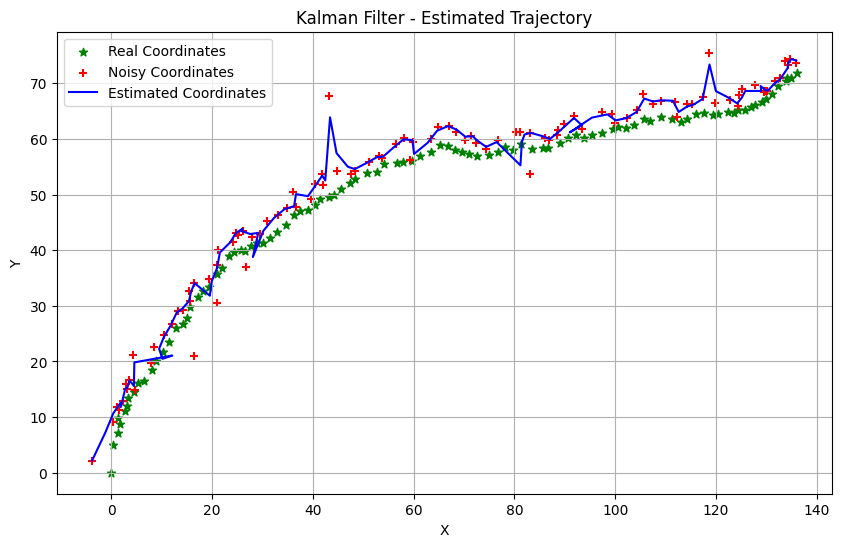

In [35]:
# Example usage
noisy_coords = np.genfromtxt('/content/drive/MyDrive/a.csv', delimiter=',')  # Load noisy coordinates (x) from file
real_coords = np.genfromtxt('/content/drive/MyDrive/x.csv', delimiter=',')  # Load real coordinates (x) from file
noisy_coords_y = np.genfromtxt('/content/drive/MyDrive/b.csv', delimiter=',')  # Load noisy coordinates (y) from file
real_coords_y = np.genfromtxt('/content/drive/MyDrive/y.csv', delimiter=',')  # Load real coordinates (y) from file

# Combine x and y coordinates
noisy_coords_combined = np.column_stack((noisy_coords, noisy_coords_y))
real_coords_combined = np.column_stack((real_coords, real_coords_y))

estimated_coords = kalman_filter(noisy_coords_combined)

# Plotting
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(real_coords_combined[:, 0], real_coords_combined[:, 1], marker='*', color='g', label='Real Coordinates')
plt.scatter(noisy_coords_combined[:, 0], noisy_coords_combined[:, 1], marker='+', color='r', label='Noisy Coordinates')
plt.plot(estimated_coords[:, 0], estimated_coords[:, 1], 'b-', label='Estimated Coordinates')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kalman Filter - Estimated Trajectory')
plt.legend()
plt.grid(True)
plt.show()


2) You should also assess the quality of the tracking by calculating the mean and standard 
deviation of the absolute error and the Root Mean Squared error (i.e. compare both noisy 
and estimated coordinates to the ground truth and discuss your findings; include the 
mathematical formulas you used for the error calculation).

In [36]:
# Error calculation
# Error calculation
error_noisy = np.abs(real_coords_combined - noisy_coords_combined)
error_estimated = np.abs(real_coords_combined - estimated_coords)

mean_error_noisy = np.mean(error_noisy)
mean_error_estimated = np.mean(error_estimated)

std_dev_noisy = np.std(error_noisy)
std_dev_estimated = np.std(error_estimated)

rmse_noisy = np.sqrt(np.mean(error_noisy ** 2))
rmse_estimated = np.sqrt(np.mean(error_estimated ** 2))

print("Mean Absolute Error (Noisy):", mean_error_noisy)
print("Mean Absolute Error (Estimated):", mean_error_estimated)
print("Standard Deviation (Noisy):", std_dev_noisy)
print("Standard Deviation (Estimated):", std_dev_estimated)
print("Root Mean Squared Error (Noisy):", rmse_noisy)
print("Root Mean Squared Error (Estimated):", rmse_estimated)


Mean Absolute Error (Noisy): 1.8168036149999998
Mean Absolute Error (Estimated): 1.693559772715127
Standard Deviation (Noisy): 2.0284447981862543
Standard Deviation (Estimated): 1.6820217064285596
Root Mean Squared Error (Noisy): 2.7231165371254202
Root Mean Squared Error (Estimated): 2.3869104978309843
